In [35]:
#Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

from statsmodels.tsa.api import VAR

#Code crdit to Adi from lesson on VAR - Notebook still work in progres. 

In [36]:
ticker = 'ZM'
df = pd.read_csv(f'data/{ticker}_stock_data.csv', index_col = 'Unnamed: 0')
df.index = pd.to_datetime(df.index)
df.head()

,1. open,2. high,3. low,4. close,5. volume,IWO_5d_EMA,IWO_10d_EMA,IWO_150d_EMA,EMA_8,EMA_21,SMA_50,SMA_200
2019-04-30,68.40,72.52,66.6700,72.47,4113123.0,199.8345,199.0351,191.6930,69.4286,NaN,NaN,NaN
2019-05-01,72.72,76.95,70.8159,72.76,3301900.0,199.1790,198.8229,191.7748,71.1000,NaN,NaN,NaN
2019-05-02,72.75,75.89,69.6912,75.50,2525285.0,199.1502,198.8720,191.8717,72.1645,NaN,NaN,NaN
2019-05-03,75.00,80.25,75.0000,79.18,2590281.0,200.5140,199.6664,192.0223,73.9613,NaN,NaN,NaN
2019-05-06,75.01,80.79,74.5000,78.24,2051824.0,201.5516,200.3865,192.1760,75.4788,NaN,NaN,NaN


In [37]:
df.isnull().sum()

1. open           0
2. high           0
3. low            0
4. close          0
5. volume         0
IWO_5d_EMA        0
IWO_10d_EMA       0
IWO_150d_EMA      0
EMA_8             0
EMA_21           13
SMA_50           42
SMA_200         192
dtype: int64

In [38]:
df = df[['4. close', '5. volume', 'IWO_5d_EMA']]
df.head()

,4. close,5. volume,IWO_5d_EMA
2019-04-30,72.47,4113123.0,199.8345
2019-05-01,72.76,3301900.0,199.1790
2019-05-02,75.50,2525285.0,199.1502
2019-05-03,79.18,2590281.0,200.5140
2019-05-06,78.24,2051824.0,201.5516


In [39]:
df.index

DatetimeIndex(['2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13',
               ...
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26'],
              dtype='datetime64[ns]', length=440, freq=None)

In [40]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    legend_list = []
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        legend_list.append(col)
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18)
    
    plt.legend(legend_list);

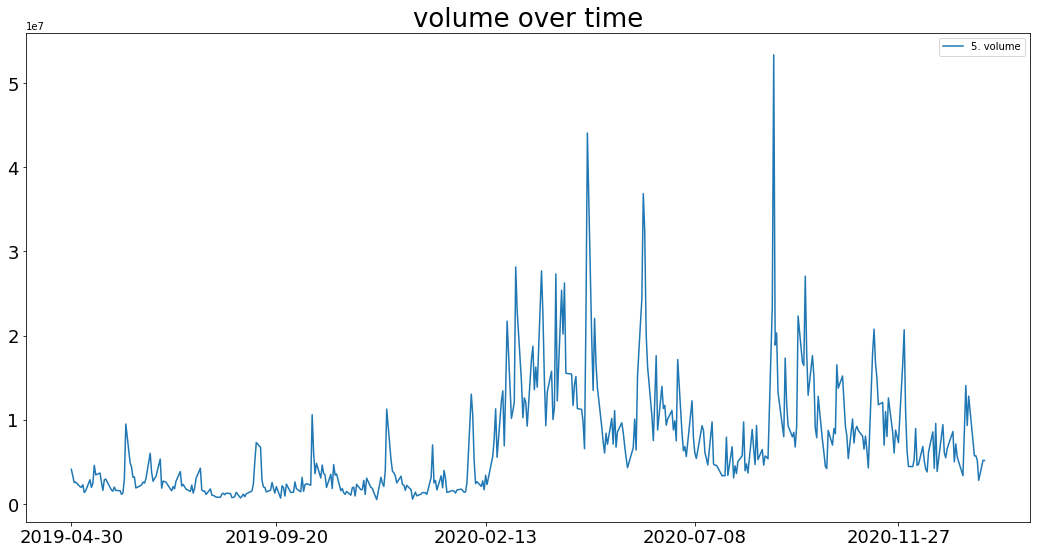

In [41]:
plot_series(df, ['5. volume'], title="volume over time", steps=100)


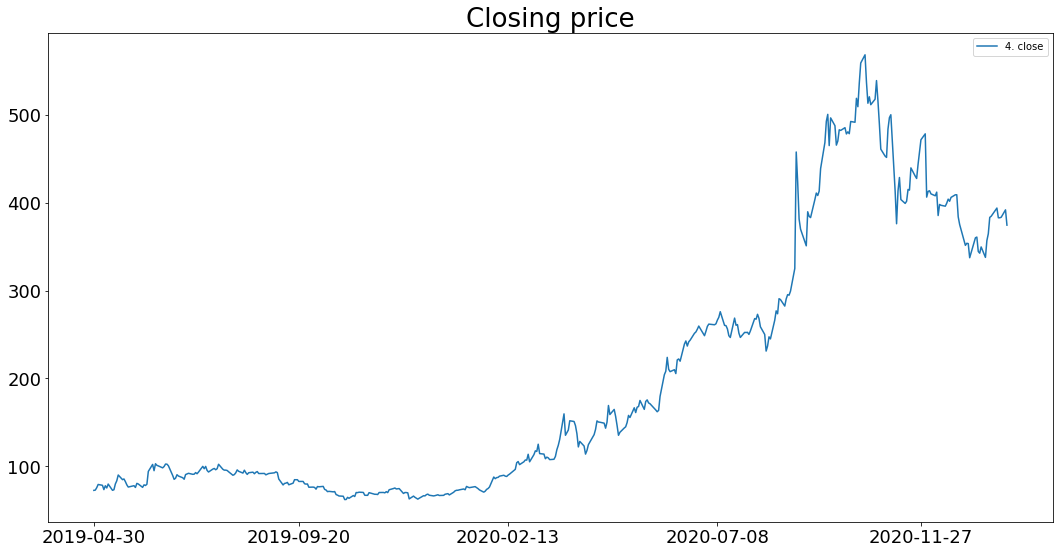

In [42]:
plot_series(df, ['4. close'], title="Closing price", steps=100)


In [43]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [44]:

# Augmentd Dicky Fuller test
adfuller(df['4. close'])

(-0.35231193283295703,
 0.9177616825679099,
 4,
 435,
 {'1%': -3.4454725477848998,
  '5%': -2.8682072297316794,
  '10%': -2.570321396485665},
 3346.8105920922567)

In [45]:
interpret_dftest(adfuller(df['4. close']))


Test Statistic   -0.352312
p-value           0.917762
Lag Used          4.000000
dtype: float64

In [46]:
interpret_dftest(adfuller(df['4. close'].diff(1).dropna()))


Test Statistic   -1.290577e+01
p-value           4.156033e-24
Lag Used          3.000000e+00
dtype: float64

In [47]:
df['first_diff_close'] = df['4. close'].diff(1)


In [48]:
df.head()

,4. close,5. volume,IWO_5d_EMA,first_diff_close
2019-04-30,72.47,4113123.0,199.8345,NaN
2019-05-01,72.76,3301900.0,199.1790,0.29
2019-05-02,75.50,2525285.0,199.1502,2.74
2019-05-03,79.18,2590281.0,200.5140,3.68
2019-05-06,78.24,2051824.0,201.5516,-0.94


In [49]:
interpret_dftest(adfuller(df['5. volume'].diff(1).dropna()))


Test Statistic   -9.427778e+00
p-value           5.289401e-16
Lag Used          1.300000e+01
dtype: float64

In [50]:
df['first_diff_volume'] = df['5. volume'].diff(1)


In [51]:
interpret_dftest(adfuller(df['IWO_5d_EMA'].diff(1).dropna()))


Test Statistic   -4.752975
p-value           0.000067
Lag Used          9.000000
dtype: float64

In [52]:
df['first_diff_IWO'] = df['IWO_5d_EMA'].diff(1)


In [53]:
df.head()

,4. close,5. volume,IWO_5d_EMA,first_diff_close,first_diff_volume,first_diff_IWO
2019-04-30,72.47,4113123.0,199.8345,NaN,NaN,NaN
2019-05-01,72.76,3301900.0,199.1790,0.29,-811223.0,-0.6555
2019-05-02,75.50,2525285.0,199.1502,2.74,-776615.0,-0.0288
2019-05-03,79.18,2590281.0,200.5140,3.68,64996.0,1.3638
2019-05-06,78.24,2051824.0,201.5516,-0.94,-538457.0,1.0376


In [54]:
diff_df = df[['first_diff_close', 'first_diff_volume', 'first_diff_IWO']].copy()

In [55]:
train, test = train_test_split(diff_df,
                               test_size = 0.25,
                              shuffle=False)

In [56]:
model = VAR(train)

/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [57]:
# Fit our model and use AIC to select the value of p.

ts_model = model.fit(maxlags=15, # what is the largest possible value of p?
                     ic='aic')   # what "information criterion" (ic) will we use to decide what's "best?"

LinAlgError: SVD did not converge in Linear Least Squares

In [34]:
ts_model.k_ar

NameError: name 'ts_model' is not defined